In [54]:
import pandas as pd
import numpy as np
import requests
import json
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials())
from pprint import pprint
import os
import matplotlib.pyplot as plt
import scipy.stats as st

In [ ]:
#grouped_tracks = top10_tracks.groupby("Artist ID")
# Mean of dancebility vs energy 
# scatter chart 
# linear regression


In [93]:
grouped_tracks= artist_df.groupby("Artist ID")


audio_analysis = grouped_tracks.agg(Danceability= pd.NamedAgg(column="Danceability", aggfunc="mean"),Energy=pd.NamedAgg(column="Energy", aggfunc="mean"),
                                     Valence=pd.NamedAgg(column="Valence", aggfunc="mean"),Instrumentalness=pd.NamedAgg(column="Instrumentalness", aggfunc="mean"),
                                   Loudness=pd.NamedAgg(column="Loudness", aggfunc="mean"),Tempo=pd.NamedAgg(column="Tempo", aggfunc="mean"))
audio_analysis                                                                                                      

,Danceability,Energy,Valence,Instrumentalness,Loudness,Tempo
Artist ID,,,,,,
00tVTdpEhQQw1bqdu8RCx2,0.432222,0.727111,0.515556,0.006895,-9.191889,131.106111
01C9OoXDvCKkGcf735Tcfo,0.526000,0.402222,0.623556,0.155163,-14.830667,110.688222
02DWGcShQivFepRvGJ7xhB,0.860000,0.545000,0.623000,0.699000,-13.852000,121.010000
02NfyD6AlLA12crYzw5YcR,0.402100,0.782100,0.344620,0.138367,-7.292300,99.442900
03YhcM6fxypfwckPCQV8pQ,0.540900,0.193880,0.376250,0.617540,-18.637900,118.559200
...,...,...,...,...,...,...
7xX15v6ahAkcT14kHfB9wB,0.642000,0.683000,0.584000,0.000000,-5.386000,154.881000
7xYxgSJaIf7yOFLmknYX38,0.453444,0.684000,0.575333,0.239686,-7.439000,132.914556
7yk35uHNQclPXFGFoTU44w,0.793400,0.751000,0.697700,0.000149,-7.294400,97.317800


In [94]:
def regression(x,y):  
    (slope,intercept,rvalue,pvalue,stderr)=st.linregress(x,y)
    regress_values= x*slope+intercept
    line_eq= "y=" + str(round(slope,2)) + "x+" + str(round(intercept,2))
    r_squared= rvalue**2
    return regress_values,line_eq,r_squared

The r-squared is : 0.05021580725057271


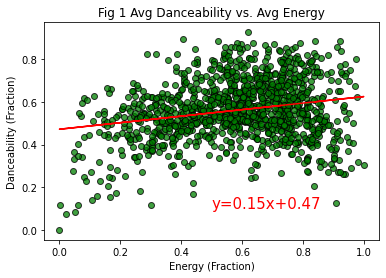

In [95]:
#Plotting scatter chart, line curve, line equation
dance_energy= regression(audio_analysis["Energy"], audio_analysis["Danceability"])
plt.scatter(audio_analysis["Energy"],audio_analysis["Danceability"], marker="o",facecolor="green", edgecolor="black", alpha= 0.75)
# Plotting the regression line
plt.plot(audio_analysis["Energy"],dance_energy[0],"r-")
#Printing the line equation
plt.annotate(dance_energy[1],(0.5,0.1), fontsize=15, color="red")
plt.xlabel("Energy (Fraction)")
plt.ylabel("Danceability (Fraction)")
plt.title("Fig 1 Avg Danceability vs. Avg Energy")
#Printing r-squared factor
print(f"The r-squared is : {dance_energy[2]}")
#saving plot as "png" file
plt.savefig("Fig1.png")
plt.show()

The r-squared is : 0.13005339331930618


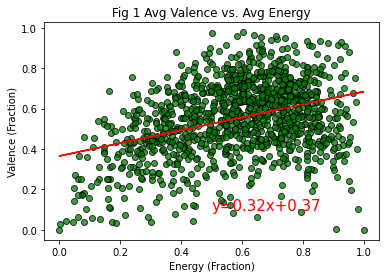

In [96]:
#Plotting scatter chart, line curve, line equation
energy_valence= regression(audio_analysis["Energy"], audio_analysis["Valence"])
plt.scatter(audio_analysis["Energy"],audio_analysis["Valence"], marker="o",facecolor="green", edgecolor="black", alpha= 0.75)
# Plotting the regression line
plt.plot(audio_analysis["Energy"],energy_valence[0],"r-")
#Printing the line equation
plt.annotate(energy_valence[1],(0.5,0.1), fontsize=15, color="red")
plt.xlabel("Energy (Fraction)")
plt.ylabel("Valence (Fraction)")
plt.title("Fig 1 Avg Valence vs. Avg Energy")
#Printing r-squared factor
print(f"The r-squared is : {energy_valence[2]}")
#saving plot as "png" file
plt.savefig("Fig1.png")
plt.show()

The r-squared is : 0.042032457959565825


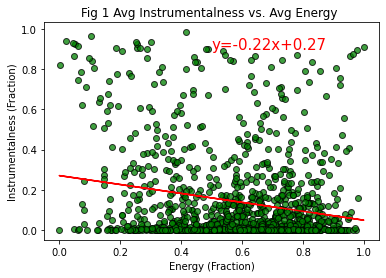

In [97]:
#Plotting scatter chart, line curve, line equation
energy_instrumentalness= regression(audio_analysis["Energy"], audio_analysis["Instrumentalness"])
plt.scatter(audio_analysis["Energy"],audio_analysis["Instrumentalness"], marker="o",facecolor="green", edgecolor="black", alpha= 0.75)
# Plotting the regression line
plt.plot(audio_analysis["Energy"],energy_instrumentalness[0],"r-")
#Printing the line equation
plt.annotate(energy_instrumentalness[1],(0.5,0.9), fontsize=15, color="red")
plt.xlabel("Energy (Fraction)")
plt.ylabel("Instrumentalness (Fraction)")
plt.title("Fig 1 Avg Instrumentalness vs. Avg Energy ")
#Printing r-squared factor
print(f"The r-squared is : {energy_instrumentalness[2]}")
#saving plot as "png" file
plt.savefig("Fig3.png")
plt.show()

The r-squared is : 0.6605830204582631


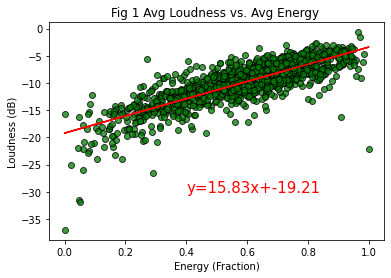

In [98]:
#Plotting scatter chart, line curve, line equation
energy_loudness= regression(audio_analysis["Energy"], audio_analysis["Loudness"])
plt.scatter(audio_analysis["Energy"],audio_analysis["Loudness"], marker="o",facecolor="green", edgecolor="black", alpha= 0.75)
# Plotting the regression line
plt.plot(audio_analysis["Energy"],energy_loudness[0],"r-")
#Printing the line equation
plt.annotate(energy_loudness[1],(0.4,-30), fontsize=15, color="red")
plt.xlabel("Energy (Fraction)")
plt.ylabel("Loudness (dB)")
plt.title("Fig 1 Avg Loudness vs. Avg Energy ")
#Printing r-squared factor
print(f"The r-squared is : {energy_loudness[2]}")
#saving plot as "png" file
plt.savefig("Fig3.png")
plt.show()

The r-squared is : 0.04133538855546662


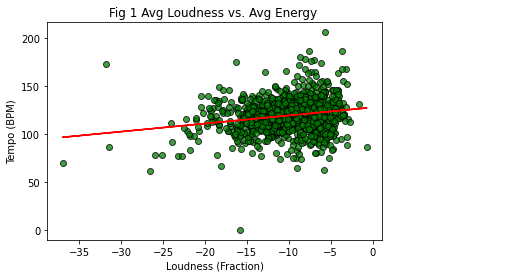

In [100]:
#Plotting scatter chart, line curve, line equation
tempo_loudness= regression(audio_analysis["Loudness"], audio_analysis["Tempo"])
plt.scatter(audio_analysis["Loudness"],audio_analysis["Tempo"], marker="o",facecolor="green", edgecolor="black", alpha= 0.75)
# Plotting the regression line
plt.plot(audio_analysis["Loudness"],tempo_loudness[0],"r-")
#Printing the line equation
plt.annotate(tempo_loudness[1],(0.4,-30), fontsize=15, color="red")
plt.xlabel("Loudness (Fraction)")
plt.ylabel("Tempo (BPM)")
plt.title("Fig 1 Avg Loudness vs. Avg Energy ")
#Printing r-squared factor
print(f"The r-squared is : {tempo_loudness[2]}")
#saving plot as "png" file
plt.savefig("Fig6.png")
plt.show()

In [ ]:
#grouped_tracks = top10_tracks.groupby("Artist ID")
# Mean of Valence vs energy 
# scatter chart 
# linear regression


In [ ]:
# how many artist have same genre
# artist with multiple genre are more followed or more popular or not

In [ ]:

# group by each genre and create bins of popularity 10-20 , 20-30, 30-40
# figure out the artist count for each genre and then put the artist into bins of popularity.
# Get the 2 popularity bins and plot for each genere

In [ ]:
# finding out a track with more dancebility is more popular

In [ ]:
# in what decade hat kind of songs were more popular. ( track with what features were more popular)

In [ ]:
# Per decade plot a graph for certain features of tracks to see which feature were more popular in cetrain decades

In [ ]:
# popularity of tracks vs track duration. Are tracks with shorter duration are more popular?
# average Track duration is getting shorter over time